In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
db = pd.read_parquet('db_P4.parquet.gzip')
db = db.drop(columns='log_SiteEnergyUseWN(kBtu)') # On supprime la cible 2 pour éviter toute confusion
db

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,per_gfa_parking,per_gfa_bulding,site_per_electricity,site_per_steam,...,Pre-school/Daycare,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc)",Restaurant,Retail Store,Self-Storage Facility,Social/Meeting Hall,Supermarket/Grocery Store,Swimming Pool,Worship Facility
0,1,47.61220,-122.33799,1927,1.0,12,0.000000,1.000000,0.546060,0.277302,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,47.61317,-122.33393,1996,1.0,11,0.145453,0.854547,0.386609,0.000000,...,0.000000,0.0,0.0,0.044629,0.0,0.0,0.0,0.0,0.0,0.0
2,3,47.61393,-122.33810,1969,1.0,41,0.205748,0.794252,0.682307,0.297113,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,5,47.61412,-122.33664,1926,1.0,10,0.000000,1.000000,0.407519,0.325913,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,8,47.61375,-122.34047,1980,1.0,18,0.353115,0.646885,0.378802,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,50221,47.54067,-122.37441,1982,1.0,1,0.000000,1.000000,0.678440,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1479,50223,47.59625,-122.32283,2004,1.0,1,0.000000,1.000000,0.417296,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1480,50224,47.63644,-122.35784,1974,1.0,1,0.000000,1.000000,0.310820,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1481,50225,47.52832,-122.32431,1989,1.0,1,0.000000,1.000000,0.484898,0.000000,...,0.034324,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
db.columns

Index(['OSEBuildingID', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'per_gfa_parking',
       'per_gfa_bulding', 'site_per_electricity', 'site_per_steam',
       'site_per_gaz', 'log_TotalGHGEmissions', 'Bank Branch',
       'College/University', 'Data Center', 'Distribution Center',
       'Fitness Center/Health Club/Gym', 'Food Service',
       'Hospital (General Medical & Surgical)', 'Hotel', 'K-12 School',
       'Laboratory', 'Manufacturing/Industrial Plant', 'Medical Office',
       'Multifamily Housing', 'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Other - Entertainment/Public Assembly', 'Other - Recreation',
       'Other - Services', 'Parking', 'Pre-school/Daycare',
       'Refrigerated Warehouse',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Restaurant',
       'Retail Store', 'Self-Storage Facility', 'Social/Meeting Hall',
       'Supermarket/Grocery Store', 'Swimming Pool', 'Worship Facility'],
      dtype='o

# Variables prédictives X & Cible y 

In [4]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from time import time


In [5]:
X = db.drop(columns=['log_TotalGHGEmissions','OSEBuildingID']).copy()
X = np.array(X)
X

array([[  47.6122 , -122.33799, 1927.     , ...,    0.     ,    0.     ,
           0.     ],
       [  47.61317, -122.33393, 1996.     , ...,    0.     ,    0.     ,
           0.     ],
       [  47.61393, -122.3381 , 1969.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [  47.63644, -122.35784, 1974.     , ...,    0.     ,    0.     ,
           0.     ],
       [  47.52832, -122.32431, 1989.     , ...,    0.     ,    0.     ,
           0.     ],
       [  47.53939, -122.29536, 1938.     , ...,    0.     ,    0.     ,
           0.     ]])

In [6]:
y = db['log_TotalGHGEmissions'].copy()
y = np.array(y)
y

array([5.52138091, 5.68988637, 7.64457479, ..., 5.40959037, 3.09602999,
       3.72013584])

# Train & Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 2023)

# Modèle 

In [8]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [9]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.076s
	Explained variance: 0.28022515719255836
	Mean absolute error: 0.9407083287873068
	R2 score: 0.25637818993990624

GradientBoostingRegressor()
	Training time: 0.303s
	Prediction time: 0.000s
	Explained variance: 0.6334679484026671
	Mean absolute error: 0.6903940317159245
	R2 score: 0.6314968681405783

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.016s
	Explained variance: 0.28022515719255836
	Mean absolute error: 0.9407083287873068
	R2 score: 0.25637818993990624

ExtraTreesRegressor()
	Training time: 0.581s
	Prediction time: 0.016s
	Explained variance: 0.590020194071176
	Mean absolute error: 0.7006539459782296
	R2 score: 0.5852396148590231

RandomForestRegressor()
	Training time: 0.731s
	Prediction time: 0.016s
	Explained variance: 0.6020147046099102
	Mean absolute error: 0.7057503222600346
	R2 score: 0.5994386589794309

DecisionTreeRegressor()
	Training time: 0.016s
	Prediction time: 0.000s
	Explai

## Grid search CV

In [10]:
# from sklearn.model_selection import GridSearchCV

In [11]:
# parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
#               'learning_rate' : (0.05,0.25,0.50,1),
#               'criterion' : ['friedman_mse', 'mse', 'mae'],
#               'max_features' : ['auto', 'sqrt', 'log2']
#              }

In [12]:
# grid = GridSearchCV(GradientBoostingRegressor(),parameters)
# model = grid.fit(X_train,y_train)
# print(model.best_params_,'\n')
# print(model.best_estimator_,'\n')

## Régression linéaire 

In [13]:
# reg = LinearRegression().fit(X_train, y_train) # Régression linéaire

In [14]:
# reg.score(X, y) # R2

In [15]:
# y_pred = reg.predict(X_test) # Prédiction sur X_test

In [16]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

In [17]:
# # The coefficients
# print("Coefficients: \n", reg.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Cross validation

In [18]:
# cross_val_score(LinearRegression(),X_train,y_train,cv=5)#,scoring='r2')

In [19]:
# from sklearn.model_selection import KFold

In [20]:
# # Create 5 folds
# seed = 7
# kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# # Create a model 
# model = LinearRegression()

# # Train and evaluate multiple models using kfolds
# results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
# print(results)
# print("Mean:", results.mean())
# print("Std:", results.std())

In [21]:
# 

# Fonction à écrire ML 
    Comparer les modèles

In [87]:
# Fonction 

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def ML (model, X = X_train, y = y_train, param = None):
    
    seed = 7
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)

    if param is not None:
        
        gs = GridSearchCV(model, param_grid = param, cv = kfold, scoring = 'r2').fit(X,y)
        print(gs.best_params_)
        model.set_params(**gs.best_params_)
    
    list_pred = []
    list_val = []

    start = time()
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)
    
    for train, test in kfold:
        list_pred.append(model.fit(X[train],y[train]).predict(X[test]))
        list_val.append(y[test])
        
    end = time()
    
    list_pred = np.concatenate(list_pred)
    list_val = np.concatenate(list_val)

    print(
    mean_squared_error(list_pred,list_val),
    r2_score(list_pred,list_val))
    
    
    return     mean_squared_error(list_pred,list_val),r2_score(list_pred,list_val), list_pred,list_val,end-start

###  Test 

In [32]:
ML(LinearRegression(),param = None)[2] #OK !

1.0220306136287551 0.28837970443069616


array([2.30435354, 2.2830803 , 5.52577248, ..., 3.72966702, 3.34827107,
       3.56717954])

In [ ]:
 print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:",mean_squared_error(list_pred,list_val))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

In [34]:
for model in regressors:
    print(model)
    #print('\t',ML(model))
    print("\tMean absolute error:",ML(model)[0])
    print("\tR2 score:",ML(model)[1])

KNeighborsRegressor()
1.721400007388838 -1.191688359332495
	Mean absolute error: 1.721400007388838
1.721400007388838 -1.191688359332495
	R2 score: -1.191688359332495
GradientBoostingRegressor()
0.7385526131258199 0.4113968960969884
	Mean absolute error: 0.7385526131258199
0.7396950435803085 0.4095282527104285
	R2 score: 0.4095282527104285
KNeighborsRegressor()
1.721400007388838 -1.191688359332495
	Mean absolute error: 1.721400007388838
1.721400007388838 -1.191688359332495
	R2 score: -1.191688359332495
ExtraTreesRegressor()
0.7722358279078838 0.4612965908280162
	Mean absolute error: 0.7722358279078838
0.7774712011611588 0.4639970882536044
	R2 score: 0.4639970882536044
RandomForestRegressor()
0.7804273536695084 0.42392591027721194
	Mean absolute error: 0.7804273536695084
0.7785933392060411 0.42721103028841834
	R2 score: 0.42721103028841834
DecisionTreeRegressor()
1.4016976058575181 0.34018313380486054
	Mean absolute error: 1.4016976058575181
1.3927480158978782 0.35730556350167797
	R2 sco

### ZIP

In [ ]:
########################

# Utiliser ZIP
# For model in param in ZIP

# for model, param in zip(model_list, params_list):

In [89]:
model_list = [LinearRegression(),
              RandomForestRegressor(n_jobs=-1),
             ]

params_list =  [None,
                { 'n_estimators' : [80, 100, 120] ,
                 'max_depth': [5, 10, 20, 25],
                 'min_samples_split': [2, 5, 8, 10],
                 'min_samples_leaf': [1, 2, 5]
                } 
                
               
               ]



zip_object = zip(model_list,params_list)


In [90]:
for model,param in zip(model_list,params_list):
    print(model,ML(model=model,param=param))

1.0220306136287551 0.28837970443069616
LinearRegression() (1.0220306136287551, 0.28837970443069616, array([2.30435354, 2.2830803 , 5.52577248, ..., 3.72966702, 3.34827107,
       3.56717954]), array([2.43185743, 4.32134732, 4.78197656, ..., 3.50435547, 4.05577697,
       4.49914278]), 0.012968063354492188)
{'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.7750211498899324 0.41795433958984685
RandomForestRegressor(max_depth=25, min_samples_leaf=2, n_jobs=-1) (0.7750211498899324, 0.41795433958984685, array([2.5960099 , 2.59715682, 4.9414435 , ..., 4.10581347, 3.83689249,
       4.11672342]), array([2.43185743, 4.32134732, 4.78197656, ..., 3.50435547, 4.05577697,
       4.49914278]), 1.1246705055236816)


In [88]:
ML(RandomForestRegressor(),param= {'n_estimators' : [80, 100, 120]
} )

{'n_estimators': 100}
0.7769463398725915 0.4325409033268749


(0.7769463398725915,
 0.4325409033268749,
 array([2.60615811, 2.61768895, 4.92680149, ..., 4.22320965, 3.90781087,
        3.99782448]),
 array([2.43185743, 4.32134732, 4.78197656, ..., 3.50435547, 4.05577697,
        4.49914278]),
 3.5678935050964355)

In [69]:
from multiprocessing import Pool
import os
cpuCount = os.cpu_count()
cpuCount

8

support vector regression 

•C: [5, 10, 20]
•gamma: ['scale', 'auto']
•kernel: ['poly', 'rbf', 'linear’]
•epsilon: [0.05, 0.1, 0.3, 1]

lightGBM:
•n_estimators: [80, 100, 120, 150]
•max_depth: [3, 5, 8, 10]
•num_leaves: [6, 8, 10]

Arbre de decisions:

•max_depth: [8, 10, 12]
      min_samples_split: [5, 8, 10, 12]
•min_samples_leaf: [1, 2, 3]
•splitter : ['best', 'random']

XGboost : 
    'regressor__learning_rate' : [0.01, 0.1, 0.5],
    'regressor__gamma': [0, 0.5, 1.0],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_child_weight' : [1, 5, 10],
    'regressor__n_estimators': [50, 100, 1000]

In [45]:
for params_list in model_list in zip(model_list,params_list)

SyntaxError: invalid syntax (1773008098.py, line 1)

In [41]:
# Fonction 

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


def ML_hyper (model, X = X_train, y = y_train, param = zip_object):
    
    seed = 7
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)

    if param is not None:
        
        gs = GridSearchCV(model, param_grid = param, cv = kfold, scoring = 'r2').fit(X,y)
        print(gs.best_params_)
        model.set_params(**gs.best_params_)
    
    list_pred = []
    list_val = []

    start = time()
    
    for train, test in kfold:
        list_pred.append(model.fit(X[train],y[train]).predict(X[test]))
        list_val.append(y_train[test])
        
    end = time()
    
    list_pred = np.concatenate(list_pred)
    list_val = np.concatenate(list_val)

    print(
    mean_squared_error(list_pred,list_val),
    r2_score(list_pred,list_val))
    
    
    return     mean_squared_error(list_pred,list_val),r2_score(list_pred,list_val), list_pred,list_val,end-start

In [42]:
ML_hyper(LinearRegression())

AttributeError: 'tuple' object has no attribute 'items'

In [85]:
###############################################

In [18]:
seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)

list_pred = []
list_val = []

for train, test in kfold:
    list_pred.append(LinearRegression().fit(X_train[train],y_train[train]).predict(X_train[test]))
    list_val.append(y_train[test])
    
list_pred = np.concatenate(list_pred)
list_val = np.concatenate(list_val)

print(
    mean_squared_error(list_pred,list_val),
    r2_score(list_pred,list_val))

1.0220306136287551 0.28837970443069616


In [19]:
pred = LinearRegression().fit(X_train,y_train).predict(X_test)
print(
    mean_squared_error(pred,y_test),
    r2_score(pred,y_test))

1.1326884159450412 0.30520287263382895


# RF 

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)

list_pred = []
list_val = []

for train, test in kfold:
    list_pred.append(RandomForestRegressor().fit(X_train[train],y_train[train]).predict(X_train[test]))
    list_val.append(y_train[test])
    
list_pred = np.concatenate(list_pred)
list_val = np.concatenate(list_val)

print(
    mean_squared_error(list_pred,list_val),
    r2_score(list_pred,list_val))

0.778732044209826 0.4267721360423117


In [64]:
params = { 'n_estimators' : [80, 100, 120] ,
          'max_depth': [5, 10, 20, 25],
          'min_samples_split': [2, 5, 8, 10],
          #'min_samples_leaf': [1, 2, 5]

}

In [65]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, param_grid = params, cv = 5, scoring ='r2' )
result = grid.fit(X_train, y_train)

C:\Users\kiehl\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kiehl\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kiehl\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\kiehl\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\kiehl\Anaconda3\lib\site-packages

In [66]:
result.best_params_, result.best_score_

({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 120},
 0.6352146450933968)

In [72]:
seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)

list_pred = []
list_val = []

for train, test in kfold:
    list_pred.append(RandomForestRegressor(max_depth = 20 , min_samples_leaf = 1, min_samples_split = 2, n_estimators =120).fit(X_train[train],y_train[train]).predict(X_train[test]))
    list_val.append(y_train[test])
    print(r2_score(list_pred[len(list_pred)-1],list_val[len(list_val)-1]))
    
list_pred = np.concatenate(list_pred)
list_val = np.concatenate(list_val)

print(
    mean_squared_error(list_pred,list_val),
    r2_score(list_pred,list_val))

0.37287380861025665
0.40429682532675737
0.5105283643204281
0.46395880488823127
0.4134347854018453
0.7666983202053571 0.43640663132543145


In [22]:
import seaborn as sns


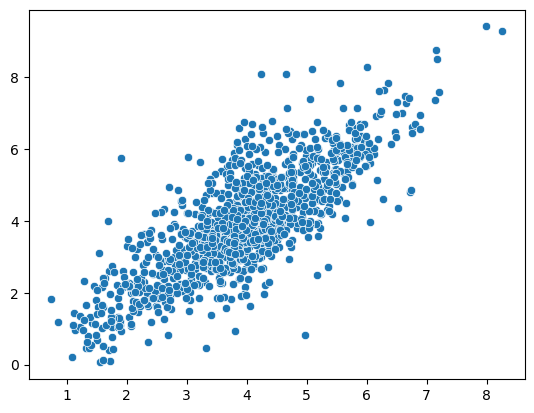

In [24]:
sns.scatterplot(x=list_pred,y=list_val)
plt.show()

# SVM 

In [34]:
from sklearn import svm
regr = svm.SVR()
regrl = svm.LinearSVR()

In [63]:
seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed).split(X_train)

list_pred = []
list_val = []

for train, test in kfold:
    list_pred.append(regr.fit(X_train[train],y_train[train]).predict(X_train[test]))
    list_val.append(y_train[test])
    
list_pred = np.concatenate(list_pred)
list_val = np.concatenate(list_val)

print(
    mean_squared_error(list_pred,list_val),
    r2_score(list_pred,list_val))

2.17262928970345 -1049.5654034110885


In [38]:
pred = svm.SVR().fit(X_train,y_train).predict(X_test)
print(
    mean_squared_error(pred,y_test),
    r2_score(pred,y_test))

2.12985090973467 -801.4785635804216


# XG boost 

In [98]:
import xgboost as xgb

XGboost : 
    'regressor__learning_rate' : [0.01, 0.1, 0.5],
    'regressor__gamma': [0, 0.5, 1.0],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_child_weight' : [1, 5, 10],
    'regressor__n_estimators': [50, 100, 1000]

In [40]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

In [104]:
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror' ,n_jobs= 6)

In [105]:
param_xgb = {
    'regressor__learning_rate' : [0.01, 0.1, 0.5],
    'regressor__gamma': [0, 0.5, 1.0],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_child_weight' : [1, 5, 10],
    'regressor__n_estimators': [50, 100, 1000]
}

In [107]:
ML(xg_reg)

0.7733677887871019 0.518471300397608


(0.7733677887871019,
 0.518471300397608,
 array([3.0956697, 2.4279904, 3.5552063, ..., 4.0537953, 4.366442 ,
        3.988847 ], dtype=float32),
 array([2.43185743, 4.32134732, 4.78197656, ..., 3.50435547, 4.05577697,
        4.49914278]),
 0.6692144870758057)

In [43]:
# xg_reg.fit(X_train,y_train)

# preds = xg_reg.predict(X_test)

[11:08:11] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


# LightBoost 

In [49]:
import lightgbm as lgb

In [94]:
lg = lgb.LGBMRegressor(n_jobs=-1)

In [54]:
param_lg = {'n_estimators': [80, 100, 120, 150],
            'max_depth': [3, 5, 8, 10],
            'num_leaves': [6, 8, 10]}

In [96]:
ML(lg,param=param_lg)

{'max_depth': 3, 'n_estimators': 150, 'num_leaves': 8}
0.7320437432494372 0.48011500501771964


(0.7320437432494372,
 0.48011500501771964,
 array([2.12798625, 2.3067684 , 4.76983983, ..., 4.24691239, 3.95023849,
        3.66770904]),
 array([2.43185743, 4.32134732, 4.78197656, ..., 3.50435547, 4.05577697,
        4.49914278]),
 0.21941065788269043)